In [3]:
import torchvision
import torch

In [4]:
import warnings
# to remove outdated numpy matmult errors
warnings.filterwarnings("ignore", category=DeprecationWarning, message="__array_wrap__ must accept context and return_scalar arguments")


In [5]:
transform = torchvision.transforms.Compose(
    transforms=[
    torchvision.transforms.ToTensor(),
]
)

trainset = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

100.0%
100.0%
100.0%
100.0%


In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [7]:
print("Training images: ", len(trainloader))
print("Test images: ", len(testloader))

Training images:  15000
Test images:  2500


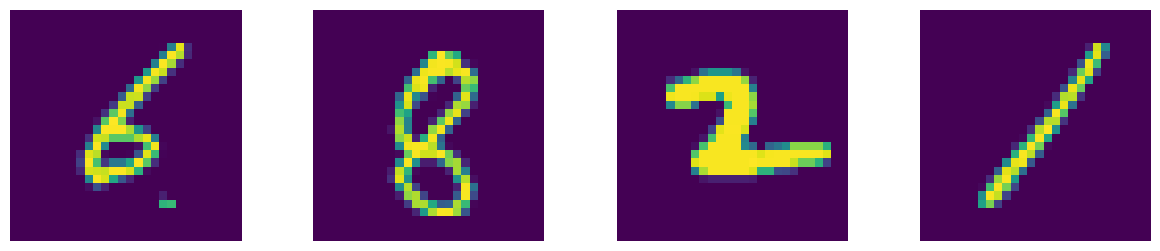

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
trainiter = iter(trainloader)
images, labels = next(trainiter)

first_batch = images[:4]


fig, axes = plt.subplots(1,4, figsize=(15,3))
for i in range(4):
    reshaped = np.transpose(first_batch[i], (1,2,0))
    plt.imshow(reshaped)
    
    
    axes[i].imshow(reshaped)
    axes[i].axis('off')

plt.show()





In [10]:
print(images[0].size())
print("Min pixel: ", torch.min(images))
print("Max pixel: ", torch.max(images))

torch.Size([1, 28, 28])
Min pixel:  tensor(0.)
Max pixel:  tensor(1.)


In [13]:
for i, (images, labels) in enumerate(trainloader):
    images = images.view(images.size(0), -1)
    images = images.numpy()

In [16]:
def one_hot(labels, num_classes):
        one_hot = np.zeros((labels.shape[0], num_classes))
        one_hot[np.arange(labels.shape[0]), labels] = 1.0
        return one_hot
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

In [35]:
class Model():
    def __init__(self):
        self.w1 = np.random.randn(784,128)*0.01
        self.b1 = np.zeros(128)
        self.w2 = np.random.randn(128,10)*0.01
        self.b2 = np.zeros(10)
        


    def forward(self, image):
        self.z1 = image @ self.w1 + self.b1
        self.a1 = np.maximum(0, self.z1) # relu
        self.z2 = self.a1 @  self.w2 + self.b2
        self.softmaxed = softmax(self.z2)

    
    def backward(self, image, labels):
        self.one_hot_encoded = one_hot(labels, 10)
        
        # A lot of this is copied because I haven't taken multivariable yet
        dz = self.softmaxed - self.one_hot_encoded
        self.dW2 = self.a1.T.dot(dz)        
        self.db2 = np.sum(dz, axis=0)
        dh = dz.dot(self.w2.T)
        da1 = dh * (self.a1 > 0)
        self.dW1 = image.T.dot(da1) 
        self.db1 = np.sum(da1, axis=0) 

        
    
    def update_params(self, lr):
        self.w1 = self.w1-self.dW1*lr
        self.w2 = self.w2-self.dW2*lr
        self.b1 = self.b1-self.db1*lr
        self.b2 = self.b2-self.db2*lr
    
    def train(self, image, labels, iterations, learning_rate):
        print("Training initiated")

        for i in range(iterations):
            self.forward(image)
            self.backward(image, labels)
            self.update_params(learning_rate)
            if i % 10 == 0:
                print(f"Iteration {i} completed")
        
        print("Training completed")

    def predict(self, image):
        self.forward(image)
        return np.argmax(self.softmaxed, axis=0)

        


        
    

In [37]:
model = Model()
model.train(images, labels, 100, 0.1)


Training initiated
Iteration 0 completed
Iteration 10 completed
Iteration 20 completed
Iteration 30 completed
Iteration 40 completed
Iteration 50 completed
Iteration 60 completed
Iteration 70 completed
Iteration 80 completed
Iteration 90 completed
Training completed


C:\Users\jaxst\AppData\Local\Temp\ipykernel_9752\2146526633.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / sum(np.exp(x))
C:\Users\jaxst\AppData\Local\Temp\ipykernel_9752\2146526633.py:6: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / sum(np.exp(x))


In [ ]:
model.predict(images[0])

tensor(1)
